In [71]:
#matplotlib online
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

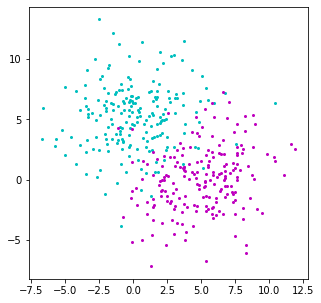

In [78]:
filename = "seeds_dataset_edits.txt"
seeds_data = pd.read_csv(filename ,sep= "\t",header= None ,index_col= None )
#print(seeds_data)

NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 5]]
m2 = [[5, 0]]
C = [[7, 1], [1, 7]]
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)

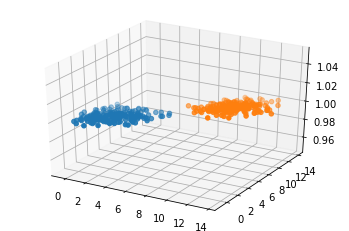

In [64]:
X = np.concatenate((X1, X2), axis=0)
#print(X)
O = np.ones((2*NumDataPerClass, 1))
#print(O)
X = np.append(X, O, axis=1)
#print(X)

O = np.ones((NumDataPerClass, 1))
X1 = np.append(X1, O, axis=1)

O = np.ones((NumDataPerClass, 1))
X2 = np.append(X2, O, axis=1)

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = X1[:,2]
xdata = X1[:,1]
ydata = X1[:,0]
ax.scatter3D(xdata, ydata, zdata,  cmap='Blues');

# Data for three-dimensional scattered points
zdata = X2[:,2]
xdata = X2[:,1]
ydata = X2[:,0]
ax.scatter3D(xdata, ydata, zdata,  cmap='orange');

#normal = np.array([-0.00059645,-0.01058425,0.06750588])
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
# create x,y
#xx, yy = np.meshgrid(range(15), range(15))

# calculate corresponding z
#z = (-normal[0] * xx - normal[1] * yy ) * 1. /normal[2]

# plot the surface
#ax.plot_wireframe(xx, yy, z,color='black', rstride=1, cstride=1)

In [65]:
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))

In [66]:
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex]
yr = y[rIndex]

# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;

(200, 3) (200,) (200, 3) (200,)


In [67]:
def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N

In [68]:
# Perceptron learning loop
#
# Random initialization of weights
#
w = np.random.randn(3)
print(w)
# What is the performance with the initial random weights?
#
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=10000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
    # Select a data item at random
    #
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    x = X_train[r,:]
    # If it is misclassified, update weights
    #
    if (y_train[r] * np.dot(x, w) < 0):
        w += alpha * y_train[r] * x
    # Evaluate trainign and test performances for plotting
    #
    P_train[iter] = PercentCorrect(X_train, y_train, w);
    P_test[iter] = PercentCorrect(X_test, y_test, w);
print('Percentage Correct After Training: %6.2f %6.2f'
%(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))
print(w)

[-1.41504376 -0.30404696 -0.41155178]
Initial Percentage Correct:  50.00
Percentage Correct After Training: 100.00 100.00
[-0.06197974  0.0028243   0.34444822]


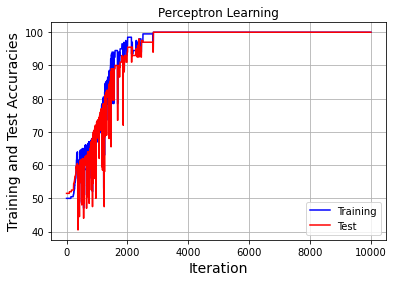

In [69]:
#[-0.14043664  0.02003463  0.74557092]
#[-1.16422297e-02  9.57280864e-06  6.33728851e-02]
#[-0.04480969  0.00224025  0.23625976]
#[-0.0039641  -0.05050924  0.31516624]
#[-0.20939909  0.05022049  1.09738041]
#[-0.03346942  0.0023207   0.18889889]
#[-0.01248589 -0.00406996  0.10411917]
#[-0.01020045 -0.02065987  0.18735582]
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')